In [2]:
import pandas as pd
import numpy as np


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from joblib import dump


## Import necessary scikit libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
# Load Dataset
df = pd.read_csv('../data.csv', encoding='latin-1')
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Encode Labels
df['Label_Num'] = df['Label'].map({'ham': 0, 'spam': 1})

In [17]:
# Split Data
X = df['Message']
y = df['Label_Num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Vectorize Messages
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Variant 1: Multinomial Naive Bayes

In [19]:
# Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

In [41]:
dump(model, "model/model.joblib")
dump(vectorizer, "model/vectorizer.joblib")

['model/vectorizer.joblib']

In [28]:
print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9483471074380165

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       842
           1       1.00      0.60      0.75       126

    accuracy                           0.95       968
   macro avg       0.97      0.80      0.86       968
weighted avg       0.95      0.95      0.94       968



Text(0.5, 1.0, 'Confusion Matrix')

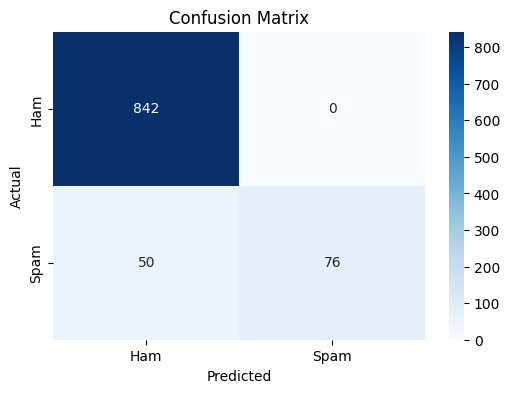

In [29]:
# Confusuion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, 
            annot = True, 
            fmt= 'd',
            cmap = 'Blues', 
            xticklabels = ['Ham', 'Spam'],
            yticklabels = ['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

## Variant 2 : Gaussian Naive Bayes

In [30]:
# Vectorize Messages
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


In [31]:
# Train Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train_vec, y_train)
y_gnb_pred = gnb_model.predict(X_test_vec)

In [32]:
# Accuracy and Report
print("Gaussian NB Accuracy Score:" , accuracy_score(y_test, y_gnb_pred))
print("\nGaussian NB Classification Report:\n", classification_report(y_test, y_gnb_pred))


Gaussian NB Accuracy Score: 0.8832644628099173

Gaussian NB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       842
           1       0.54      0.74      0.62       126

    accuracy                           0.88       968
   macro avg       0.75      0.82      0.78       968
weighted avg       0.90      0.88      0.89       968



Text(0.5, 1.0, 'Gaussian NB Confusion Matrix')

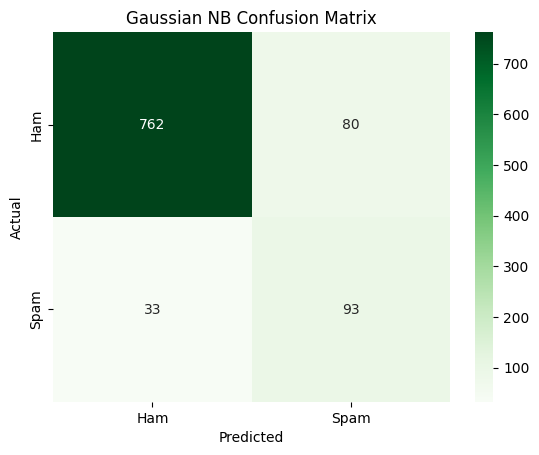

In [33]:
# Confusion Matrix for Gaussian NB
cm_gnb = confusion_matrix(y_test, y_gnb_pred)
sns.heatmap(cm_gnb, 
            annot =True,
            fmt = 'd',
            cmap = 'Greens',
            xticklabels = ['Ham','Spam'],
            yticklabels = ['Ham','Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gaussian NB Confusion Matrix')

## Variant 3 : Bernoulli Naive Bayes

In [34]:
# Vectorize Messages
vectorizer = TfidfVectorizer(binary = True)
X_train_vec = vectorizer.fit_transform(X_train)


In [35]:
# Train Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(X_train_vec, y_train)
y_bnb_pred = bnb_model.predict(X_test_vec)

In [36]:
# Accuracy and Report
print("Bernoulli NB Accuracy Score:" , accuracy_score(y_test, y_bnb_pred))
print("\nBernoulli NB Classification Report:\n", classification_report(y_test, y_bnb_pred))

Bernoulli NB Accuracy Score: 0.9638429752066116

Bernoulli NB Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       842
           1       0.99      0.73      0.84       126

    accuracy                           0.96       968
   macro avg       0.98      0.86      0.91       968
weighted avg       0.96      0.96      0.96       968



Text(0.5, 1.0, 'Bernoulli NB Confusion Matrix')

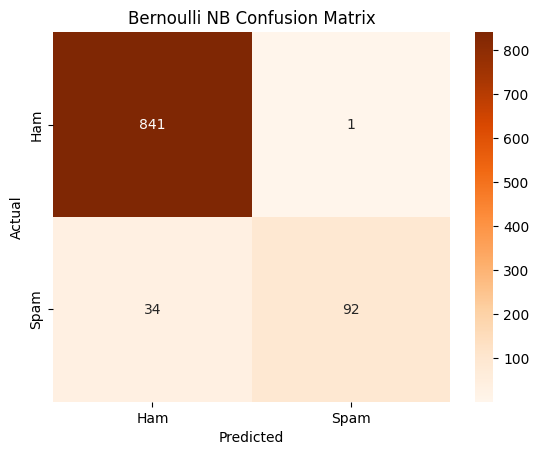

In [37]:
# Confusion Matrix for Bernoulli NB
cm_bnb = confusion_matrix(y_test, y_bnb_pred)
sns.heatmap(cm_bnb,
            annot =True,
            fmt = 'd',
            cmap = 'Oranges',
            xticklabels = ['Ham','Spam'],
            yticklabels = ['Ham','Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Bernoulli NB Confusion Matrix')